In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
from datetime import datetime, timedelta

# Define the Node class
class Node:
    def __init__(self, node_id, node_type, domain, timestamp, owner, tags=None, status="active", version=1, acl=None, audit_log=None, relationships=None, expiration=None):
        self.node_id = node_id
        self.node_type = node_type
        self.domain = domain
        self.timestamp = timestamp
        self.owner = owner
        self.tags = tags if tags else []
        self.status = status  # Set default value to "active"
        self.version = version
        self.acl = acl if acl is not None else []
        self.audit_log = audit_log if audit_log is not None else []
        self.relationships = relationships if relationships is not None else []
        self.expiration = expiration
        
    def add_acl(self, role):
        """Add an access control role to the ACL."""
        self.acl.append(role)
    
    def add_audit_log(self, action, user, timestamp):
        """Add an audit log entry."""
        self.audit_log.append({"action": action, "user": user, "timestamp": timestamp})
    
    def add_relationship(self, relationship, target_node):
        """Add a relationship to another node."""
        self.relationships.append({"relationship": relationship, "target_node": target_node.node_id})
    
    def set_expiration(self, expiration_date):
        """Set expiration date for the node."""
        self.expiration = expiration_date


# Define the RBAC class
class RBAC:
    def __init__(self):
        self.roles_permissions = {
            "admin": ["read", "write", "modify", "delete", "archive"],
            "manager": ["read", "modify", "archive"],
            "user": ["read"],
            "guest": ["read"]
        }
    
    def check_permission(self, role, action):
        """Check if the role has permission to perform the given action."""
        return action in self.roles_permissions.get(role, [])

# Function to create test nodes
def create_test_nodes():
    nodes = []
    for i in range(10):  # Create 10 nodes for testing
        node_type = random.choice(['process', 'file', 'database'])
        domain = random.choice(['finance', 'healthcare', 'it', 'marketing'])
        timestamp = (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')
        node = Node(
            node_id=str(i + 1),
            node_type=node_type,
            domain=domain,
            timestamp=timestamp,
            owner=random.choice(['admin', 'manager', 'user']),
            tags=[random.choice(['confidential', 'public', 'archived', 'high-priority'])],
            status='active',  # Default status is active
            version=1,
            acl=[],  # Default ACL is empty
            audit_log=[],  # Default audit log is empty
            relationships=[],  # Default relationships are empty
            expiration=None  # No expiration by default
        )
        nodes.append(node)
    return nodes

In [3]:
import random
from datetime import datetime, timedelta

def generate_synthetic_node(node_id, node_type, domain, owner, tags=None, expiration_date=None):
    """Create a synthetic node with random or predefined attributes."""
    node = Node(
        node_id=node_id,
        node_type=node_type,
        domain=domain,
        timestamp=datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        owner=owner,
        status='active',  # Status set to active by default
        version=1,
        tags=tags if tags else [],
        acl=[],
        audit_log=[],
        relationships=[],
        expiration=expiration_date if expiration_date else (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')
    )
    return node

def create_dynamic_relationships_based_on_tags_or_domain(nodes, domain=None, tags=None, relationship_type="related to"):
    """Create dynamic relationships based on tags or domain."""
    selected_nodes = []
    
    # Filter nodes based on domain or tags
    if domain:
        selected_nodes = [node for node in nodes if node.domain == domain]
    elif tags:
        selected_nodes = [node for node in nodes if any(tag in node.tags for tag in tags)]
    
    # Create relationships between selected nodes
    for i, node1 in enumerate(selected_nodes):
        for node2 in selected_nodes[i+1:]:
            node1.add_relationship(relationship_type, node2)
            node2.add_relationship(f"related to {node1.node_id}", node1)
    
    return selected_nodes

def enhanced_retention_policy(nodes, retention_days=365):
    """Enhanced retention policy: Archive or delete nodes based on their expiration and age."""
    archived_nodes = []
    deleted_nodes = []
    
    for node in nodes:
        if node.expiration:
            expiration_date = datetime.strptime(node.expiration, '%Y-%m-%d %H:%M:%S')
            
            # Archive nodes within 30 days of expiration
            if datetime.now() > expiration_date and (datetime.now() - expiration_date).days <= 30:
                node.status = 'archived'
                archived_nodes.append(node)
            # Delete nodes that have expired beyond the retention period
            elif datetime.now() > expiration_date and (datetime.now() - expiration_date).days > 30:
                node.status = 'deleted'
                deleted_nodes.append(node)

    return archived_nodes, deleted_nodes

def test_synthetic_node_and_rules(num_nodes=1000):
    """Test synthetic node generation, dynamic relationships, and retention rules."""
    nodes = []
    
    # Generate synthetic nodes
    for i in range(num_nodes):
        node_id = str(i + 1)
        node_type = random.choice(['file', 'process', 'database'])
        domain = random.choice(['finance', 'marketing', 'it', 'healthcare'])
        owner = random.choice(['admin', 'user', 'manager'])
        tags = random.sample(['sensitive', 'high-priority', 'public', 'archived', 'confidential'], random.randint(1, 3))
        expiration_date = (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')

        node = generate_synthetic_node(node_id, node_type, domain, owner, tags, expiration_date)
        nodes.append(node)
    
    # Apply enhanced retention policy to archive and delete nodes
    archived_nodes, deleted_nodes = enhanced_retention_policy(nodes)
    print(f"Archived Nodes: {[node.node_id for node in archived_nodes]}")
    print(f"Deleted Nodes: {[node.node_id for node in deleted_nodes]}")

    # Create relationships for nodes in the 'finance' domain
    finance_nodes = create_dynamic_relationships_based_on_tags_or_domain(nodes, domain="finance", relationship_type="reads from")
    print(f"Finance Node Relationships: {[node.relationships for node in finance_nodes]}")

    # Create relationships for nodes tagged as 'sensitive'
    sensitive_nodes = create_dynamic_relationships_based_on_tags_or_domain(nodes, tags=["sensitive"], relationship_type="reads from")
    print(f"Sensitive Node Relationships: {[node.relationships for node in sensitive_nodes]}")

# Run the test with synthetic nodes
test_synthetic_node_and_rules(num_nodes=100)

Archived Nodes: ['12', '25', '37', '46', '79', '87']
Deleted Nodes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '80', '81', '82', '83', '84', '85', '86', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
Finance Node Relationships: [[{'relationship': 'reads from', 'target_node': '14'}, {'relationship': 'reads from', 'target_node': '19'}, {'relationship': 'reads from', 'target_node': '20'}, {'relationship': 'reads from', 'target_node': '22'}, {'relationship': 'reads from', 'target_node': '27'}, {'relationship': 'reads from', 'target_node': '29'}, {'relationship': 'reads fro

   Patient ID  Symptom Severity  Medication Dosage anomaly
0           1                 3                  2  Normal
1           2                 9                  5  Normal
2           3                 4                  2  Normal
3           4                 1                  3  Normal
4           5                 2                  5  Normal
..        ...               ...                ...     ...
95         96                 7                  4  Normal
96         97                 4                  2  Normal
97         98                 5                  4  Normal
98         99                 9                  5  Normal
99        100                 7                  3  Normal

[100 rows x 4 columns]


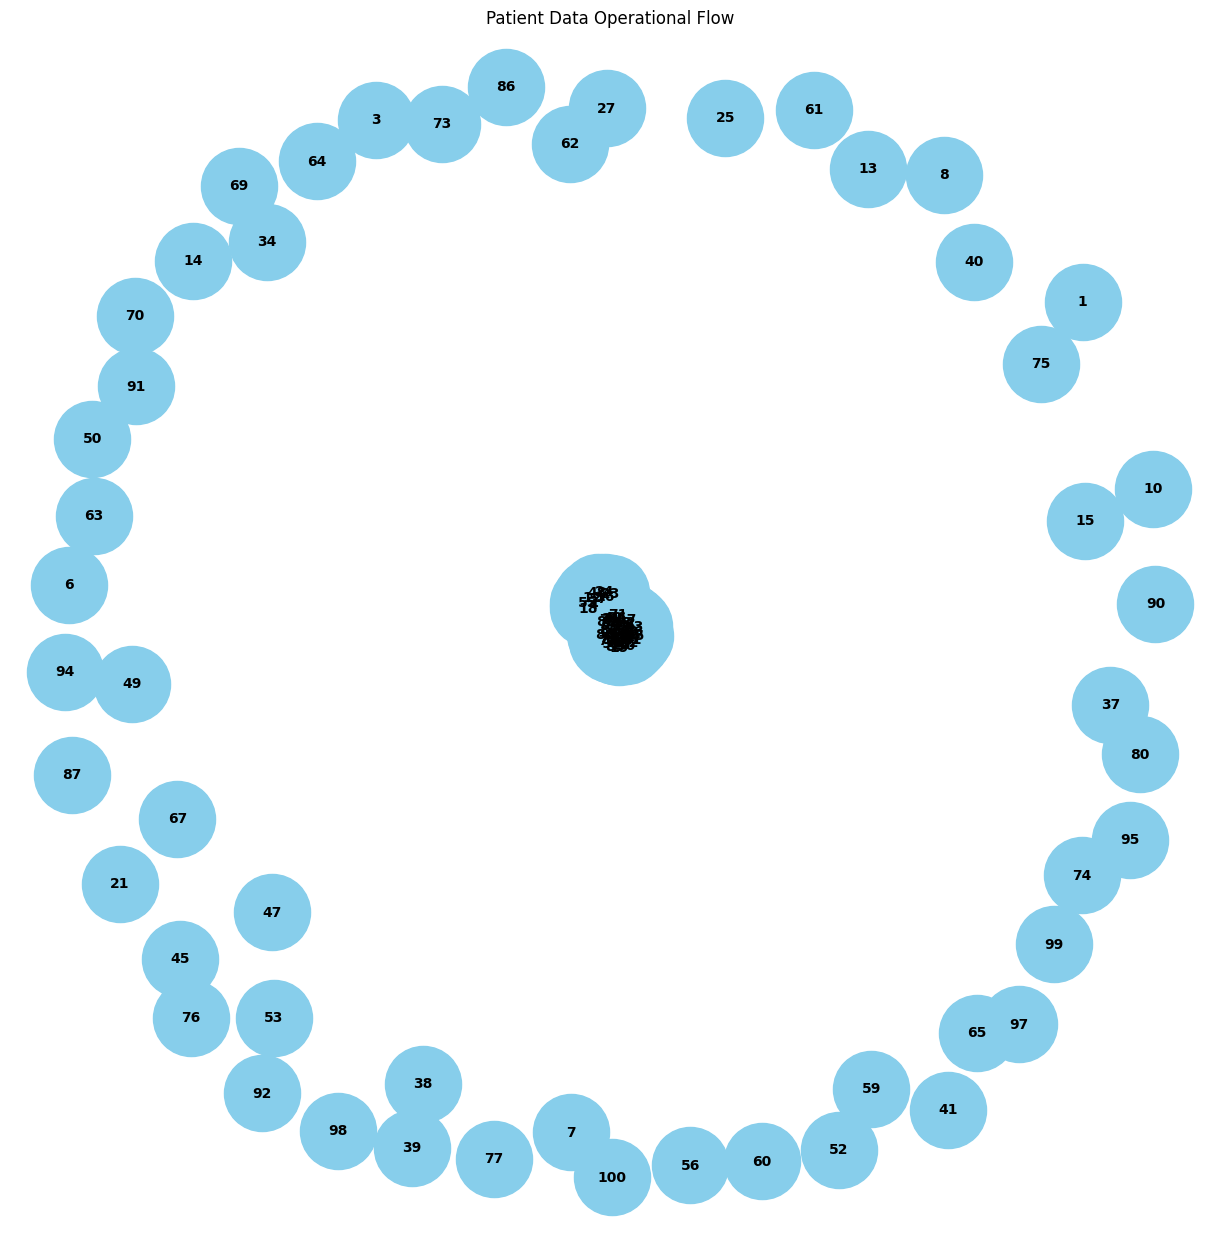

In [4]:
# 1. Import Libraries and Setup

import random
import pandas as pd
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Additional libraries for anomaly detection (Active Graph Networks)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# 2. Define Node and Relationship Models

class Node:
    def __init__(self, node_id, node_type, domain, timestamp, owner, tags=None, status="active", version=1, acl=None, audit_log=None, relationships=None, expiration=None):
        self.node_id = node_id
        self.node_type = node_type
        self.domain = domain
        self.timestamp = timestamp
        self.owner = owner
        self.tags = tags if tags else []
        self.status = status  # Set default value to "active"
        self.version = version
        self.acl = acl if acl is not None else []
        self.audit_log = audit_log if audit_log is not None else []
        self.relationships = relationships if relationships is not None else []
        self.expiration = expiration
        
    def add_acl(self, role):
        """Add an access control role to the ACL."""
        self.acl.append(role)
    
    def add_audit_log(self, action, user, timestamp):
        """Add an audit log entry."""
        self.audit_log.append({"action": action, "user": user, "timestamp": timestamp})
    
    def add_relationship(self, relationship, target_node):
        """Add a relationship to another node."""
        self.relationships.append({"relationship": relationship, "target_node": target_node.node_id})
    
    def set_expiration(self, expiration_date):
        """Set expiration date for the node."""
        self.expiration = expiration_date

# 3. Generate Synthetic Patient Data

def generate_synthetic_node(node_id, node_type, domain, owner, tags=None, expiration_date=None):
    """Create a synthetic node with random or predefined attributes."""
    node = Node(
        node_id=node_id,
        node_type=node_type,
        domain=domain,
        timestamp=datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        owner=owner,
        status='active',  # Status set to active by default
        version=1,
        tags=tags if tags else [],
        acl=[],
        audit_log=[],
        relationships=[],
        expiration=expiration_date if expiration_date else (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')
    )
    return node

# 4. Create Relationships Between Entities (Patient, Diagnosis, Medication)

def create_dynamic_relationships_based_on_tags_or_domain(nodes, domain=None, tags=None, relationship_type="related to"):
    """Create dynamic relationships based on tags or domain."""
    selected_nodes = []
    
    # Filter nodes based on domain or tags
    if domain:
        selected_nodes = [node for node in nodes if node.domain == domain]
    elif tags:
        selected_nodes = [node for node in nodes if any(tag in node.tags for tag in tags)]
    
    # Create relationships between selected nodes
    for i, node1 in enumerate(selected_nodes):
        for node2 in selected_nodes[i+1:]:
            node1.add_relationship(relationship_type, node2)
            node2.add_relationship(f"related to {node1.node_id}", node1)
    
    return selected_nodes

# 5. Define Anomaly Detection Using AGN

def detect_anomalies(data, feature_columns):
    """Detect anomalies using Isolation Forest"""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[feature_columns])
    
    # Train an isolation forest model to detect outliers (anomalies)
    model = IsolationForest(n_estimators=100, contamination=0.05)
    model.fit(data_scaled)
    
    data['anomaly'] = model.predict(data_scaled)
    data['anomaly'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})
    return data

# 6. Visualizing Relationships and Operational Flow

import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(nodes):
    """Visualize the relationship graph for nodes"""
    G = nx.DiGraph()
    
    # Add nodes and relationships to the graph
    for node in nodes:
        G.add_node(node.node_id, label=node.node_type)
        for relationship in node.relationships:
            G.add_edge(node.node_id, relationship['target_node'])
    
    # Plot the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold')
    plt.title('Patient Data Operational Flow')
    plt.show()

# 7. Running the Synthetic Node Creation and Anomaly Detection

def test_synthetic_node_and_rules(num_nodes=100):
    """Test synthetic node generation, dynamic relationships, and retention rules."""
    nodes = []
    
    # Generate synthetic nodes
    for i in range(num_nodes):
        node_id = str(i + 1)
        node_type = random.choice(['file', 'process', 'database'])
        domain = random.choice(['finance', 'marketing', 'it', 'healthcare'])
        owner = random.choice(['admin', 'user', 'manager'])
        tags = random.sample(['sensitive', 'high-priority', 'public', 'archived', 'confidential'], random.randint(1, 3))
        expiration_date = (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')

        node = generate_synthetic_node(node_id, node_type, domain, owner, tags, expiration_date)
        nodes.append(node)
    
    # Apply dynamic relationships
    create_dynamic_relationships_based_on_tags_or_domain(nodes, domain="healthcare", relationship_type="reads from")
    create_dynamic_relationships_based_on_tags_or_domain(nodes, tags=["sensitive"], relationship_type="related to")
    
    # Run anomaly detection (e.g., patient visit behavior anomalies)
    data = pd.DataFrame({
        'Patient ID': [node.node_id for node in nodes],
        'Symptom Severity': [random.randint(1, 10) for _ in nodes],
        'Medication Dosage': [random.randint(1, 5) for _ in nodes]
    })
    
    result = detect_anomalies(data, ['Symptom Severity', 'Medication Dosage'])
    print(result)
    
    # Visualize relationships in the network
    visualize_graph(nodes)

# Running the test with synthetic nodes
test_synthetic_node_and_rules(num_nodes=100)

In [5]:
# Let's simulate more features to enhance anomaly detection
def generate_synthetic_patient_data(num_nodes=100):
    """Generate enhanced synthetic patient data."""
    data = pd.DataFrame({
        'Patient ID': [f'Patient_{i+1}' for i in range(num_nodes)],
        'Symptom Severity': [random.randint(1, 10) for _ in range(num_nodes)],
        'Medication Dosage': [random.randint(1, 5) for _ in range(num_nodes)],
        'Age': [random.randint(18, 80) for _ in range(num_nodes)],
        'Visit Frequency': [random.randint(1, 10) for _ in range(num_nodes)],
        'Medication Interaction Risk': [random.choice([0, 1]) for _ in range(num_nodes)],  # 0 - low risk, 1 - high risk
    })
    return data

# Generate the enhanced data
patient_data = generate_synthetic_patient_data(100)

# Let's visualize the first few rows of the enhanced dataset
patient_data.head()

Patient ID  Symptom Severity  Medication Dosage  Age  Visit Frequency  \
0  Patient_1                 3                  4   58                5   
1  Patient_2                10                  5   34                8   
2  Patient_3                 8                  1   44               10   
3  Patient_4                 8                  1   20                5   
4  Patient_5                 1                  1   28                4   

   Medication Interaction Risk  
0                            1  
1                            0  
2                            1  
3                            0  
4                            1

In [6]:
# Import the necessary libraries and functions
import random
from datetime import datetime, timedelta

# Generate synthetic nodes
def generate_synthetic_nodes(num_nodes=100):
    """Generate a list of synthetic nodes for testing."""
    nodes = []
    for i in range(num_nodes):
        node_id = str(i + 1)
        node_type = random.choice(['file', 'process', 'database'])
        domain = random.choice(['finance', 'marketing', 'it', 'healthcare'])
        owner = random.choice(['admin', 'user', 'manager'])
        tags = random.sample(['sensitive', 'high-priority', 'public', 'archived', 'confidential'], random.randint(1, 3))
        expiration_date = (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d %H:%M:%S')

        node = Node(
            node_id=node_id,
            node_type=node_type,
            domain=domain,
            timestamp=datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            owner=owner,
            tags=tags,
            expiration=expiration_date
        )
        nodes.append(node)
    return nodes

# Generate synthetic nodes
nodes = generate_synthetic_nodes(100)

In [7]:
def create_deeper_relationships(nodes, relationships):
    """Create deeper synthetic relationships based on patient data."""
    for node in nodes:
        # Simulate a relationship between medication and symptom severity
        if "high-priority" in node.tags:  # Example condition
            for related in relationships:
                target_node = random.choice(nodes)
                node.add_relationship(related, target_node)
    return nodes

# Define relationships and create them
relationships = ["Medication affects", "Diagnosed with"]
nodes_with_deeper_relationships = create_deeper_relationships(nodes, relationships)

# Check the relationships for the first few nodes
for node in nodes_with_deeper_relationships[:5]:
    print(f"Node {node.node_id} relationships: {node.relationships}")

Node 1 relationships: []
Node 2 relationships: []
Node 3 relationships: []
Node 4 relationships: [{'relationship': 'Medication affects', 'target_node': '22'}, {'relationship': 'Diagnosed with', 'target_node': '38'}]
Node 5 relationships: [{'relationship': 'Medication affects', 'target_node': '54'}, {'relationship': 'Diagnosed with', 'target_node': '88'}]


In [8]:
def create_deeper_relationships(nodes, relationships):
    """Create deeper synthetic relationships based on patient data."""
    for node in nodes:
        if node.node_type == "process" and "Medication" in node.tags:
            # Simulate a relationship between medication and symptom severity
            node.add_relationship("Medication affects", node.node_id)  # Assuming medication affects symptoms
            # Simulate the relationship to condition severity
            node.add_relationship("Diagnosed with", node.node_id)
    
    return nodes

# Simulate deeper relationships for a subset of nodes
nodes_with_deeper_relationships = create_deeper_relationships(nodes, ["Medication affects", "Diagnosed with"])

In [9]:
# Simulate temporal changes for a subset of the data
def simulate_temporal_changes(data):
    """Simulate changes in patient data over time."""
    data['Symptom Severity Change'] = data['Symptom Severity'] + random.randint(-2, 2)
    data['Medication Dosage Change'] = data['Medication Dosage'] + random.randint(-1, 1)
    return data

# Apply temporal changes to the patient data
patient_data_with_temporal_changes = simulate_temporal_changes(patient_data)

# Check out the data with simulated temporal changes
patient_data_with_temporal_changes.head()

Patient ID  Symptom Severity  Medication Dosage  Age  Visit Frequency  \
0  Patient_1                 3                  4   58                5   
1  Patient_2                10                  5   34                8   
2  Patient_3                 8                  1   44               10   
3  Patient_4                 8                  1   20                5   
4  Patient_5                 1                  1   28                4   

   Medication Interaction Risk  Symptom Severity Change  \
0                            1                        3   
1                            0                       10   
2                            1                        8   
3                            0                        8   
4                            1                        1   

   Medication Dosage Change  
0                         3  
1                         4  
2                         0  
3                         0  
4                         0

In [10]:
from sklearn.ensemble import IsolationForest

def detect_anomalies_with_multiple_features(data):
    """Detect anomalies using multiple features including temporal changes."""
    feature_columns = ['Symptom Severity', 'Medication Dosage', 'Age', 'Visit Frequency', 'Medication Interaction Risk']
    
    # Normalize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[feature_columns])
    
    # Use Isolation Forest to detect anomalies
    model = IsolationForest(n_estimators=100, contamination=0.05)
    model.fit(data_scaled)
    
    data['Anomaly'] = model.predict(data_scaled)
    data['Anomaly'] = data['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})
    
    return data

# Detect anomalies with the new features
patient_data_with_anomalies = detect_anomalies_with_multiple_features(patient_data_with_temporal_changes)

# View the anomalies detected
patient_data_with_anomalies.head()

Patient ID  Symptom Severity  Medication Dosage  Age  Visit Frequency  \
0  Patient_1                 3                  4   58                5   
1  Patient_2                10                  5   34                8   
2  Patient_3                 8                  1   44               10   
3  Patient_4                 8                  1   20                5   
4  Patient_5                 1                  1   28                4   

   Medication Interaction Risk  Symptom Severity Change  \
0                            1                        3   
1                            0                       10   
2                            1                        8   
3                            0                        8   
4                            1                        1   

   Medication Dosage Change Anomaly  
0                         3  Normal  
1                         4  Normal  
2                         0  Normal  
3                         0  Normal  
4                         0  Normal

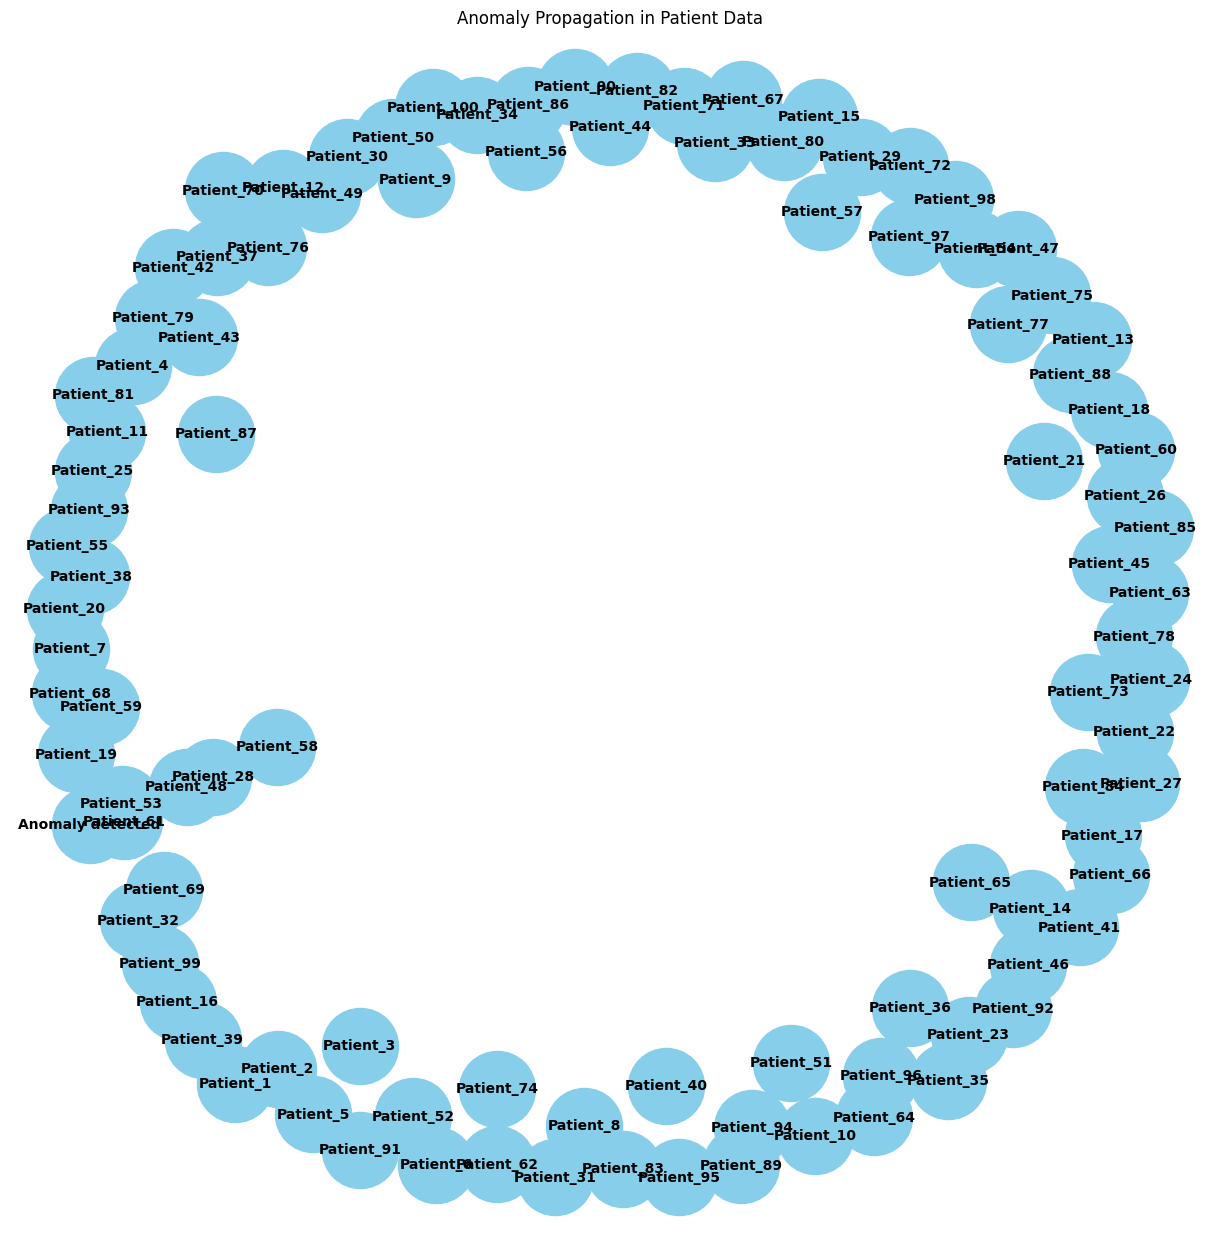

In [11]:
# Visualize anomaly propagation through the graph
import networkx as nx

def visualize_patient_anomalies(patient_data, anomaly_column='Anomaly'):
    """Visualize anomalies in the patient data graph."""
    G = nx.DiGraph()
    
    # Add nodes and edges based on the data and relationships
    for _, row in patient_data.iterrows():
        G.add_node(row['Patient ID'], label=row['Anomaly'])
        
        if row['Anomaly'] == 'Anomaly':
            G.add_edge(row['Patient ID'], 'Anomaly detected')  # Link the anomaly to a detection point
    
    # Plot the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold')
    plt.title('Anomaly Propagation in Patient Data')
    plt.show()

# Visualize anomalies
visualize_patient_anomalies(patient_data_with_anomalies)

In [12]:
def create_deeper_relationships(nodes, relationships):
    """Create deeper synthetic relationships based on patient data."""
    for node in nodes:
        # Simulate a relationship between medication and symptom severity
        if "high-priority" in node.tags:  # Example condition
            for related in relationships:
                target_node = random.choice(nodes)
                node.add_relationship(related, target_node)
    return nodes

# Define relationships and create them
relationships = ["Medication affects", "Diagnosed with"]
nodes_with_deeper_relationships = create_deeper_relationships(nodes, relationships)

# Check the relationships for the first few nodes
for node in nodes_with_deeper_relationships[:5]:
    print(f"Node {node.node_id} relationships: {node.relationships}")

Node 1 relationships: []
Node 2 relationships: []
Node 3 relationships: []
Node 4 relationships: [{'relationship': 'Medication affects', 'target_node': '22'}, {'relationship': 'Diagnosed with', 'target_node': '38'}, {'relationship': 'Medication affects', 'target_node': '74'}, {'relationship': 'Diagnosed with', 'target_node': '92'}]
Node 5 relationships: [{'relationship': 'Medication affects', 'target_node': '54'}, {'relationship': 'Diagnosed with', 'target_node': '88'}, {'relationship': 'Medication affects', 'target_node': '66'}, {'relationship': 'Diagnosed with', 'target_node': '38'}]


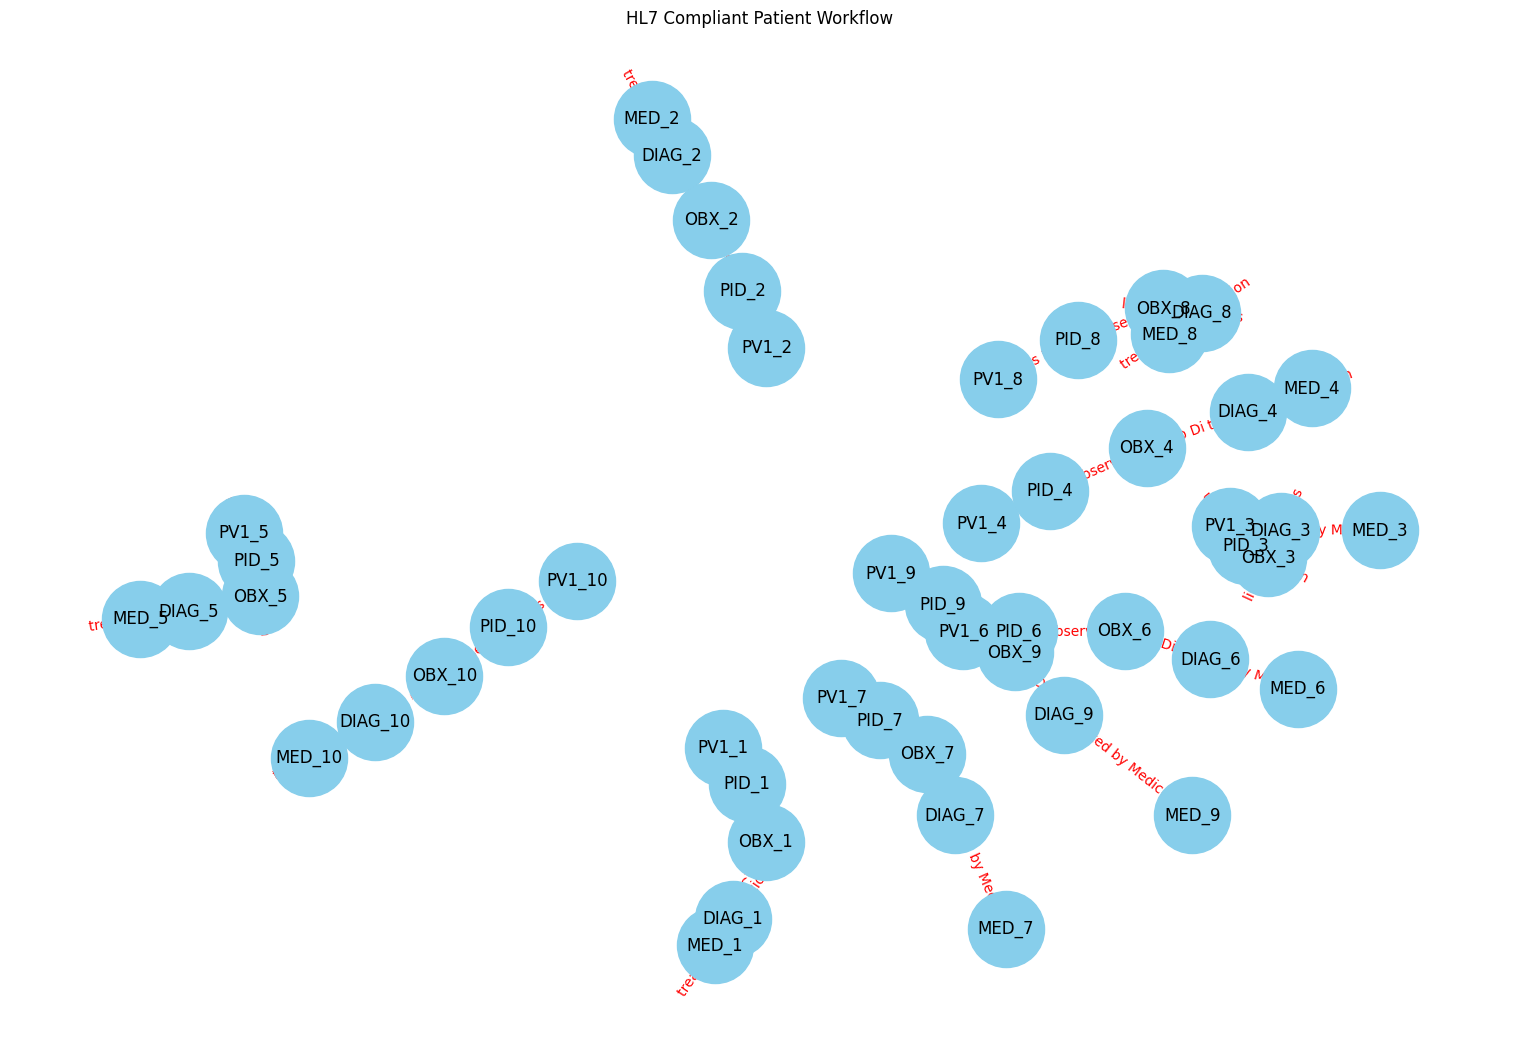

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Synthetic Node Generator
def generate_hl7_compliant_nodes(num_patients=5):
    nodes = []
    for i in range(1, num_patients + 1):
        # Patient (PID)
        pid_node = {
            'node_id': f"PID_{i}",
            'node_type': 'Patient Identification',
            'attributes': {
                'First Name': f"Patient_{i}",
                'Last Name': f"Last_{i}",
                'DOB': (datetime.now() - timedelta(days=random.randint(20*365, 50*365))).strftime('%Y-%m-%d'),
                'Gender': random.choice(['M', 'F']),
            }
        }
        nodes.append(pid_node)

        # Patient Visit (PV1)
        pv1_node = {
            'node_id': f"PV1_{i}",
            'node_type': 'Patient Visit',
            'attributes': {
                'Admission Date': (datetime.now() - timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d'),
                'Discharge Date': datetime.now().strftime('%Y-%m-%d'),
                'Visit Type': random.choice(['Inpatient', 'Outpatient']),
            }
        }
        nodes.append(pv1_node)

        # Observations (OBX)
        obx_node = {
            'node_id': f"OBX_{i}",
            'node_type': 'Observation',
            'attributes': {
                'Symptom Severity': random.randint(1, 10),
                'Test Result': random.choice(['Normal', 'Abnormal']),
            }
        }
        nodes.append(obx_node)

        # Diagnosis (DIAG)
        diag_node = {
            'node_id': f"DIAG_{i}",
            'node_type': 'Diagnosis',
            'attributes': {
                'Condition': random.choice(['Hypertension', 'Diabetes', 'Flu', 'COVID-19']),
                'ICD Code': f"I{random.randint(10, 99)}.{random.randint(1, 9)}",
            }
        }
        nodes.append(diag_node)

        # Medication (MED)
        med_node = {
            'node_id': f"MED_{i}",
            'node_type': 'Medication',
            'attributes': {
                'Medication Name': random.choice(['Paracetamol', 'Insulin', 'Antibiotics']),
                'Dosage': f"{random.randint(1, 5)} mg",
            }
        }
        nodes.append(med_node)

    return nodes

# Create Relationships Between Nodes
def create_hl7_relationships(graph, nodes):
    for node in nodes:
        graph.add_node(node['node_id'], **node)

    for i in range(1, len(nodes) // 5 + 1):
        # PID -> PV1
        graph.add_edge(f"PID_{i}", f"PV1_{i}", relationship="has Visit")
        # PID -> OBX
        graph.add_edge(f"PID_{i}", f"OBX_{i}", relationship="has Observation")
        # OBX -> DIAG
        graph.add_edge(f"OBX_{i}", f"DIAG_{i}", relationship="links to Diagnosis")
        # DIAG -> MED
        graph.add_edge(f"DIAG_{i}", f"MED_{i}", relationship="treated by Medication")
        # PV1 -> PID
        graph.add_edge(f"PV1_{i}", f"PID_{i}", relationship="updates Patient")

    return graph

# Build the Graph
def visualize_hl7_graph(graph):
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'relationship')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title("HL7 Compliant Patient Workflow")
    plt.show()

# Main Workflow
G = nx.DiGraph()
nodes = generate_hl7_compliant_nodes(num_patients=10)
G = create_hl7_relationships(G, nodes)
visualize_hl7_graph(G)

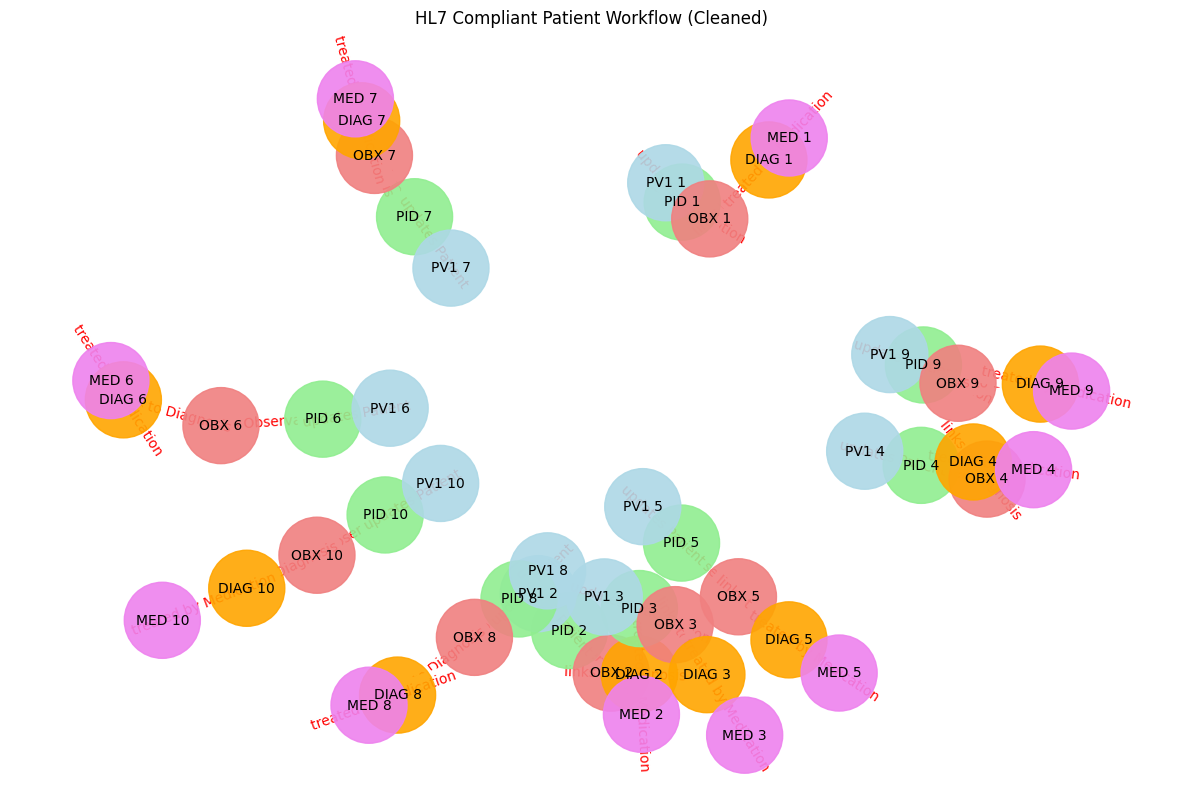

In [14]:
def visualize_hl7_graph_cleaned(graph):
    plt.figure(figsize=(15, 10))

    # Use a shell layout for better separation
    pos = nx.spring_layout(graph, seed=42)

    # Assign colors based on node type
    node_colors = []
    for node, data in graph.nodes(data=True):
        if "Patient Identification" in data['node_type']:
            node_colors.append("lightgreen")
        elif "Patient Visit" in data['node_type']:
            node_colors.append("lightblue")
        elif "Observation" in data['node_type']:
            node_colors.append("lightcoral")
        elif "Diagnosis" in data['node_type']:
            node_colors.append("orange")
        elif "Medication" in data['node_type']:
            node_colors.append("violet")
        else:
            node_colors.append("gray")

    # Draw nodes
    nx.draw_networkx_nodes(
        graph, pos,
        node_size=3000,
        node_color=node_colors,
        alpha=0.9
    )

    # Draw edges with labels
    edge_labels = nx.get_edge_attributes(graph, 'relationship')
    nx.draw_networkx_edges(graph, pos, edge_color='gray')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

    # Draw node labels with simplified names
    simplified_labels = {
        node: data['node_id'].replace("_", " ")
        for node, data in graph.nodes(data=True)
    }
    nx.draw_networkx_labels(graph, pos, labels=simplified_labels, font_size=10, font_color='black')

    plt.title("HL7 Compliant Patient Workflow (Cleaned)")
    plt.axis("off")
    plt.show()

# Visualize the cleaned graph
visualize_hl7_graph_cleaned(G)

In [15]:
pip install dash dash-cytoscape networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.5 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4010717 sha256=67284be1365edba6e9aad026ecc611ec013d32aec1aae208b1d0e88762a90b8c
  Stored in directory: /root/.cache/pip/wheels/91/23/5e/56fa701c668444b121ad2353a96478179dc49086a9c44ee930
Successfully built dash-cytoscape
Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly.graph_objects as go
import networkx as nx

# Create a sample graph
G = nx.DiGraph()
G.add_node("Patient", label="Patient")
G.add_node("Admission", label="Admission")
G.add_node("Diagnosis", label="Diagnosis")
G.add_node("Medication", label="Medication")

G.add_edges_from([
    ("Patient", "Admission"),
    ("Admission", "Diagnosis"),
    ("Diagnosis", "Medication")
])

# Create the visualization
pos = nx.spring_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

fig = go.Figure()
fig.add_trace(go.Scatter(x=edge_x, y=edge_y,
                         line=dict(width=0.5, color='#888'),
                         hoverinfo='none',
                         mode='lines'))

fig.add_trace(go.Scatter(x=node_x, y=node_y,
                         mode='markers+text',
                         text=[node for node in G.nodes()],
                         textposition="bottom center",
                         marker=dict(size=10, color='lightblue', line=dict(width=2))))
fig.update_layout(showlegend=False)
fig.show()

In [17]:
pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install dash[extra]

Note: you may need to restart the kernel to use updated packages.


In [19]:
from dash import Dash, html
import dash_cytoscape as cyto

# Sample graph elements
elements = [
    {'data': {'id': 'Patient', 'label': 'Patient'}},
    {'data': {'id': 'Admission', 'label': 'Admission'}},
    {'data': {'id': 'Diagnosis', 'label': 'Diagnosis'}},
    {'data': {'id': 'Medication', 'label': 'Medication'}},
    {'data': {'source': 'Patient', 'target': 'Admission', 'label': 'has Admission'}},
    {'data': {'source': 'Admission', 'target': 'Diagnosis', 'label': 'has Diagnosis'}},
    {'data': {'source': 'Diagnosis', 'target': 'Medication', 'label': 'Prescribes'}}
]

# Initialize the Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape',
        elements=elements,
        style={'width': '100%', 'height': '400px'},
        layout={'name': 'breadthfirst'}
    )
])

# Run the app directly in Jupyter
app.run_server(mode='inline')

In [20]:
pip install dash dash[extra] dash-cytoscape --upgrade

Note: you may need to restart the kernel to use updated packages.


In [21]:
from dash import Dash, html
import dash_cytoscape as cyto

# Sample Cytoscape elements
elements = [
    {'data': {'id': 'A', 'label': 'Node A'}},
    {'data': {'id': 'B', 'label': 'Node B'}},
    {'data': {'id': 'C', 'label': 'Node C'}},
    {'data': {'source': 'A', 'target': 'B', 'label': 'connects to'}},
    {'data': {'source': 'B', 'target': 'C', 'label': 'connects to'}}
]

# Create Dash app
app = Dash(__name__)

# Add layout
app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape',
        elements=elements,
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'circle'}
    )
])

# Run app in Jupyter
app.run_server(mode='inline')

CC-BY-NC-SA License to Csllum Maystone as licensor. 